<a href="https://colab.research.google.com/github/metetolga/DeepLearningBasics/blob/main/DigitRecognizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import itertools
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [ ]:
mnist = tf.keras.datasets.mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train / 255, X_test / 255

print(X_train.shape)

(60000, 28, 28)


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2964 - accuracy: 0.9137 - val_loss: 0.1403 - val_accuracy: 0.9579
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1444 - accuracy: 0.9571 - val_loss: 0.0964 - val_accuracy: 0.9706
Epoch 3/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1075 - accuracy: 0.9676 - val_loss: 0.0865 - val_accuracy: 0.9727
Epoch 4/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0871 - accuracy: 0.9734 - val_loss: 0.0783 - val_accuracy: 0.9771
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0743 - accuracy: 0.9766 - val_loss: 0.0737 - val_accuracy: 0.9765
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0641 - accuracy: 0.9800 - val_loss: 0.0709 - val_accuracy: 0.9783
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0576 - accuracy: 0.9811 - val_loss: 0.0716 - val_ac

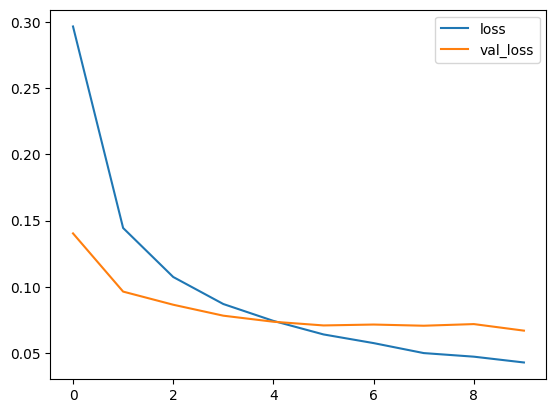

In [ ]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')

plt.legend()
plt.show()

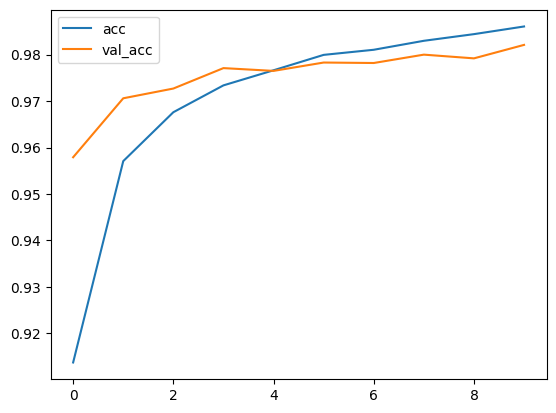

In [ ]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')

plt.legend()
plt.show()

In [ ]:
print(model.evaluate(X_test, y_test))

313/313 [==============================] - 1s 3ms/step - loss: 0.0670 - accuracy: 0.9821
[0.06698212027549744, 0.9821000099182129]


313/313 [==============================] - 2s 5ms/step
confusion matrix without normalization
[[ 973    1    0    1    0    1    2    1    1    0]
 [   0 1127    3    1    0    0    1    1    2    0]
 [   1    1 1017    1    3    0    1    4    4    0]
 [   0    0    2  997    0    3    0    4    2    2]
 [   1    1    3    0  961    0    6    2    2    6]
 [   2    0    0    7    1  877    1    0    3    1]
 [   3    3    2    1    4    4  938    0    3    0]
 [   1    6    8    1    0    1    0 1005    2    4]
 [   3    0    1    5    3    1    1    5  953    2]
 [   0    5    0    8    8    6    0    7    2  973]]


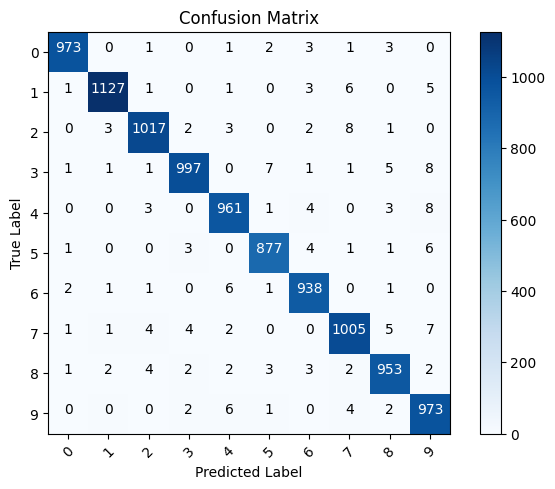

In [ ]:
def plot_cm(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("confusion matrix with normalization")
  else:
    print("confusion matrix without normalization")

  print(cm)
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(
        j, i,
        format(cm[j, i],fmt),
        horizontalalignment = 'center',
        color = 'white' if cm[j, i] > thresh else 'black'
    )
  plt.tight_layout()
  plt.ylabel('True Label')
  plt.xlabel('Predicted Label')
  plt.show()

p_test = model.predict(X_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_cm(cm, list(range(10)))

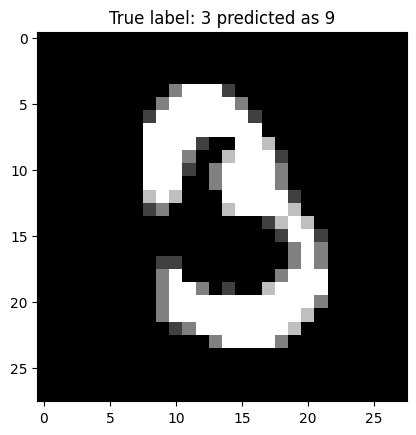

In [ ]:
misscls_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misscls_idx)
plt.imshow(X_test[i], cmap='gray')
plt.title('True label: %s predicted as %s' % (y_test[i], p_test[i]))
plt.show()